# Hat Instance Segmentation 🎩


---

This Colab notebook is a training notebook where you will learn to do object detection as well as instance segmentation using the YOLOv8 model. YOLOv8 is the latest version of the YOLO (You Only Look Once) model and provides a fast, accurate and scalable object detection solution. In this notebook, using the YOLOv8 model,
We will perform a training using the hat dataset for object detection and object partitioning. Then, using our trained model, we will detect and segment objects in the new images. This notebook
It will be at a level that anyone with an understanding of both image processing and deep learning can follow. Before you begin, keep in mind that you need to make sure your Colab environment is set to use the GPU.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed May  3 08:17:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 72.6MB/s]
2023-05-03 08:18:01.807277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 08:18:02.745528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 9.13MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 123.7ms
Speed: 0.7ms pre-process, 123.7ms inference, 377.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


/content


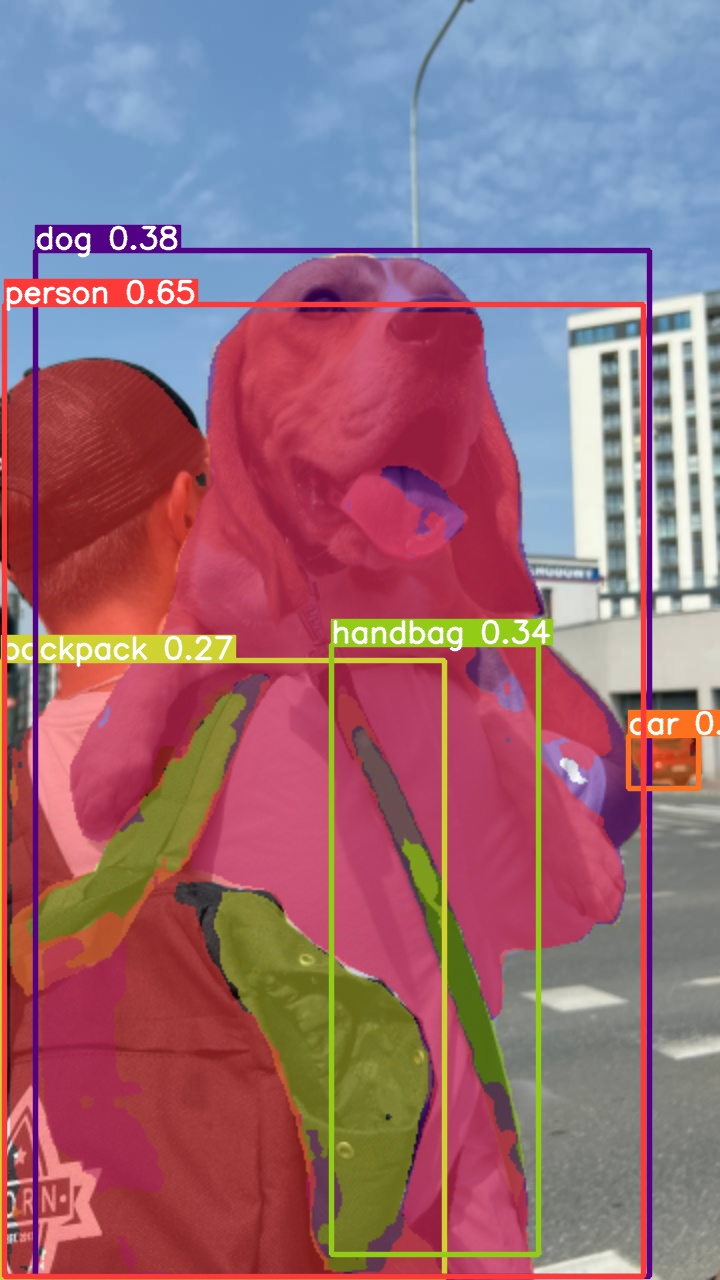

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 85.1ms
Speed: 0.6ms pre-process, 85.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[4.00000e+00, 3.04000e+02, 6.43000e+02, 1.27600e+03],
        [6.28000e+02, 7.35000e+02, 6.98000e+02, 7.88000e+02],
        [3.50000e+01, 2.50000e+02, 6.49000e+02, 1.27600e+03],
        [3.31000e+02, 6.44000e+02, 5.38000e+02, 1.25400e+03],
        [1.00000e+00, 6.60000e+02, 4.44000e+02, 1.27800e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.64894, 0.52386, 0.37839, 0.34418, 0.26679], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

## Get Roboflow Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="1fnTQuhhqtOt8TLJyzpw")
project = rf.workspace("bilal-bcztr").project("hat-dataset-2")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to hat-dataset-2-2 in yolov8:: 100%|██████████| 2012/2012 [00:00<00:00, 2974.41it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/hat-dataset-2-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, si

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    train_batch0.jpg
BoxF1_curve.png					    train_batch1.jpg
BoxP_curve.png					    train_batch2.jpg
BoxPR_curve.png					    train_batch3960.jpg
BoxR_curve.png					    train_batch3961.jpg
confusion_matrix.png				    train_batch3962.jpg
events.out.tfevents.1683101942.2e0c5de5c2e4.1207.0  val_batch0_labels.jpg
MaskF1_curve.png				    val_batch0_pred.jpg
MaskP_curve.png					    val_batch1_labels.jpg
MaskPR_curve.png				    val_batch1_pred.jpg
MaskR_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights


/content


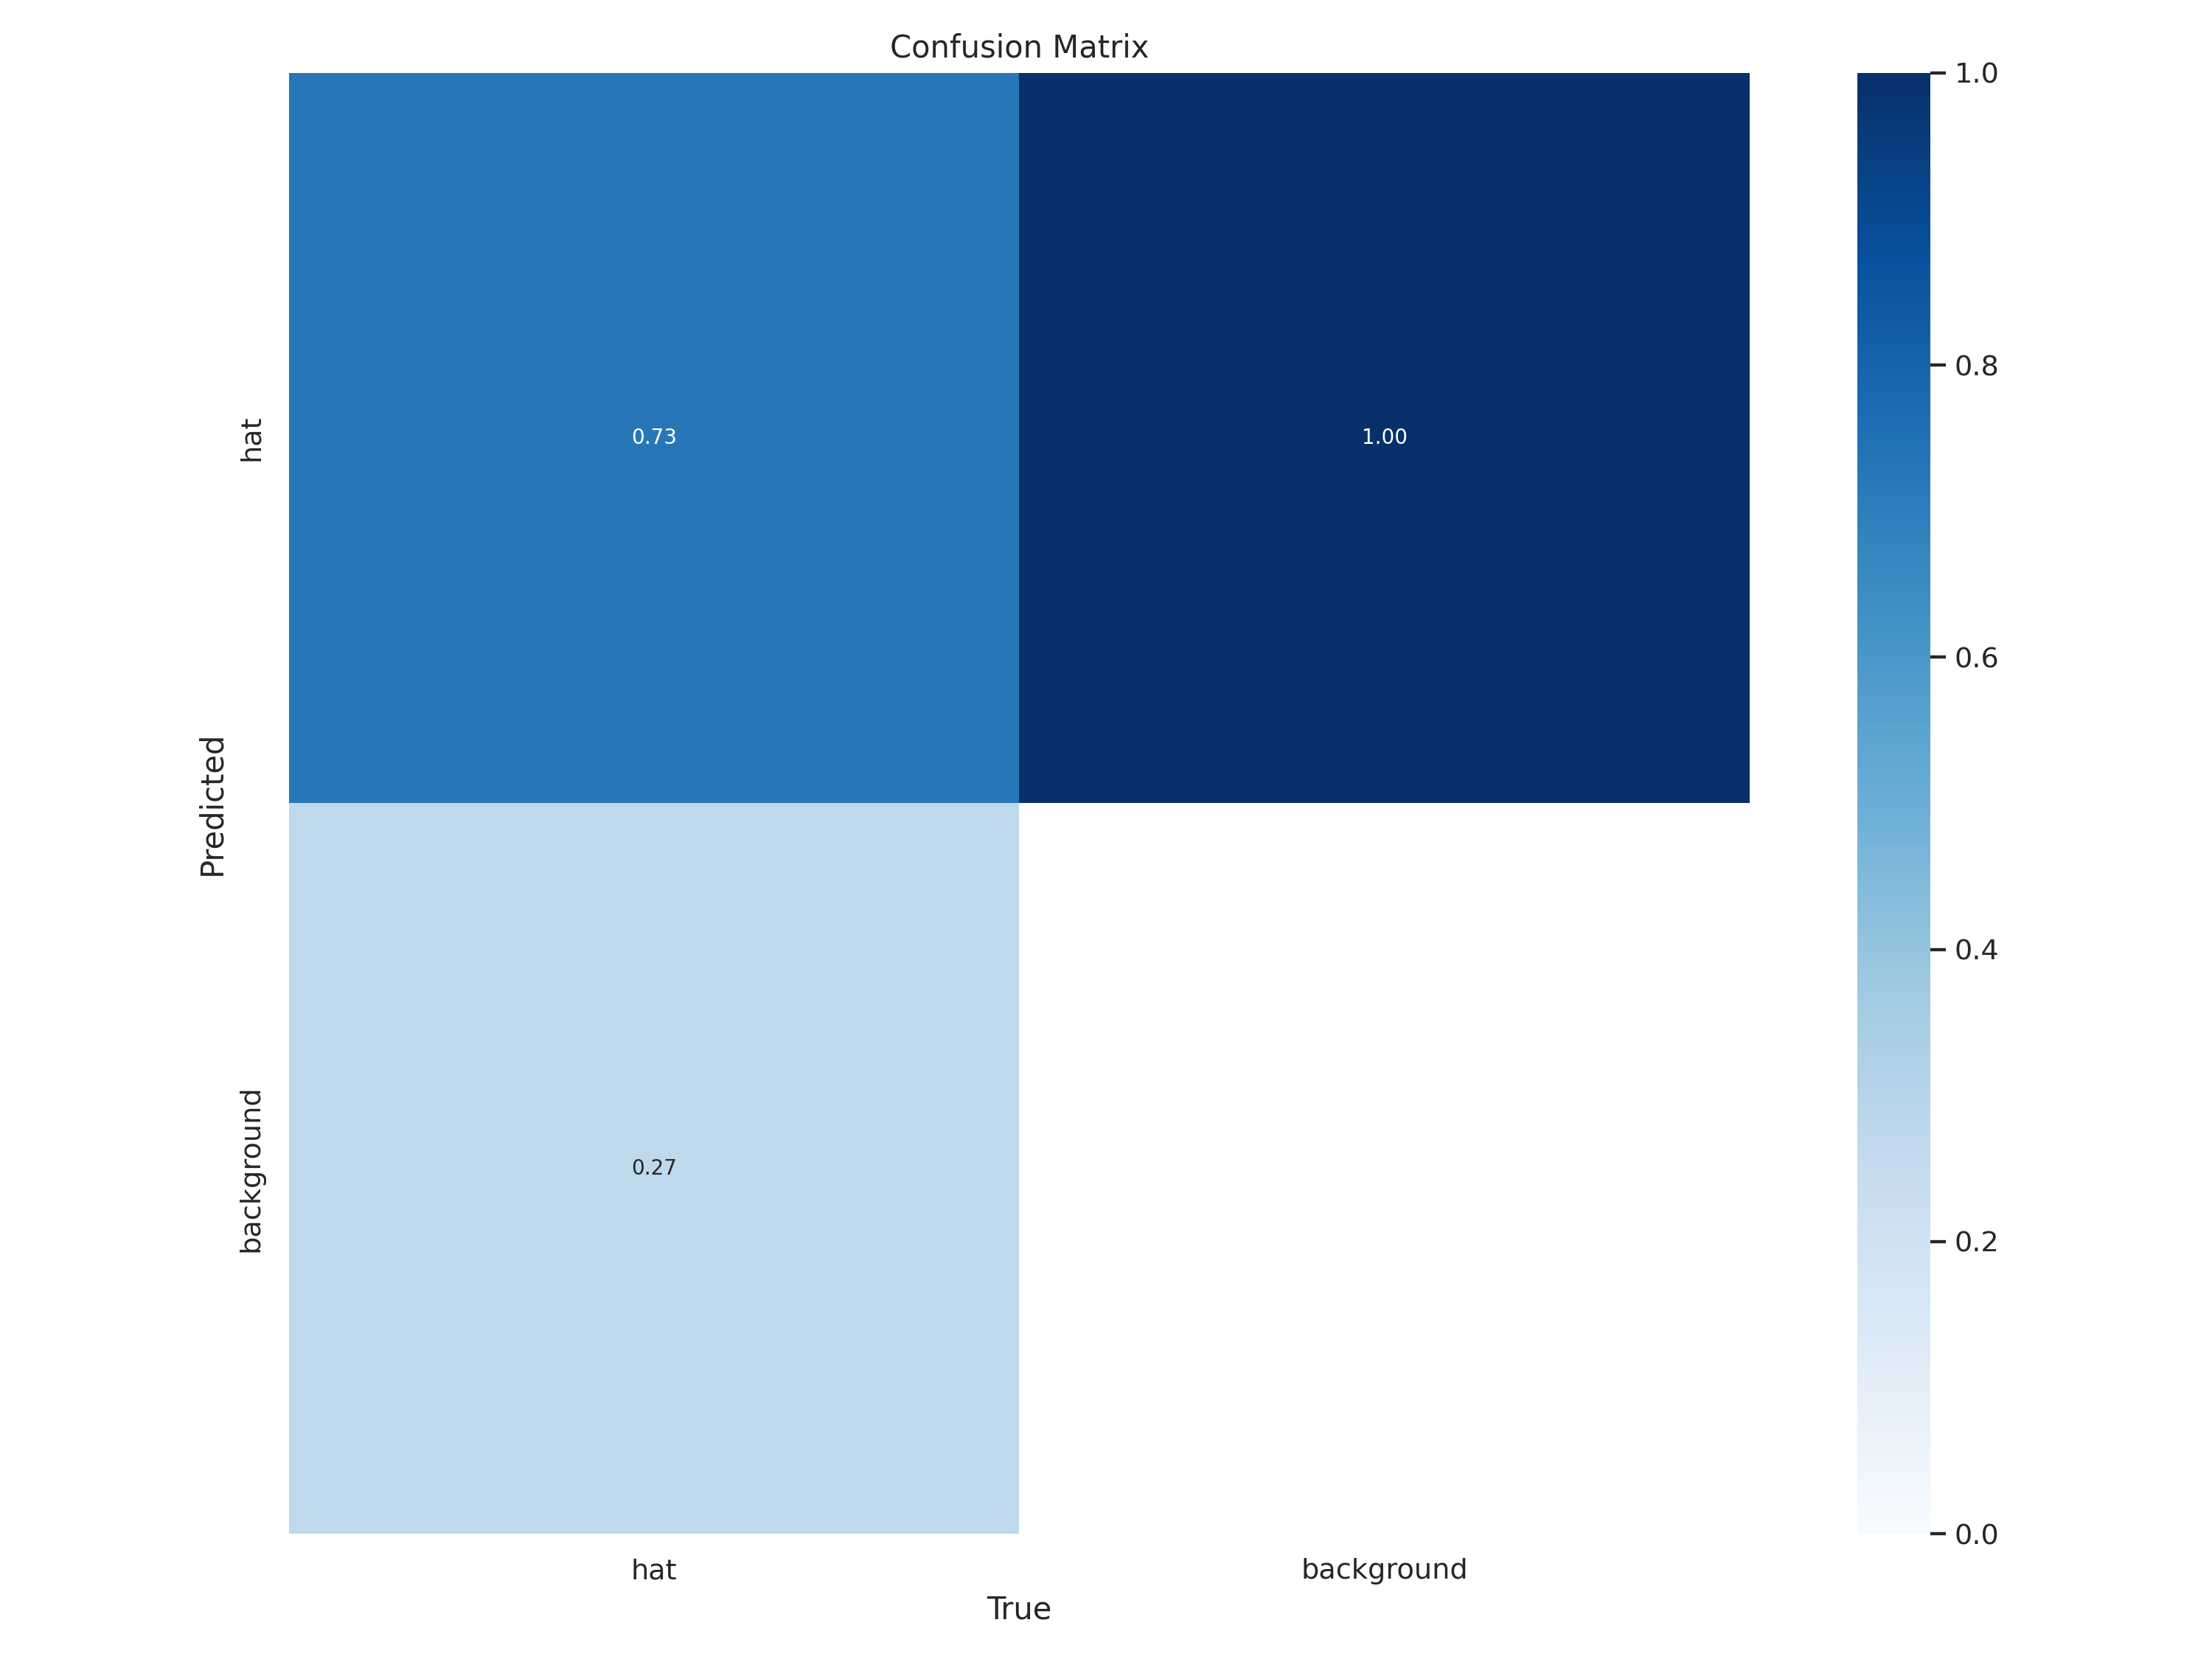

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


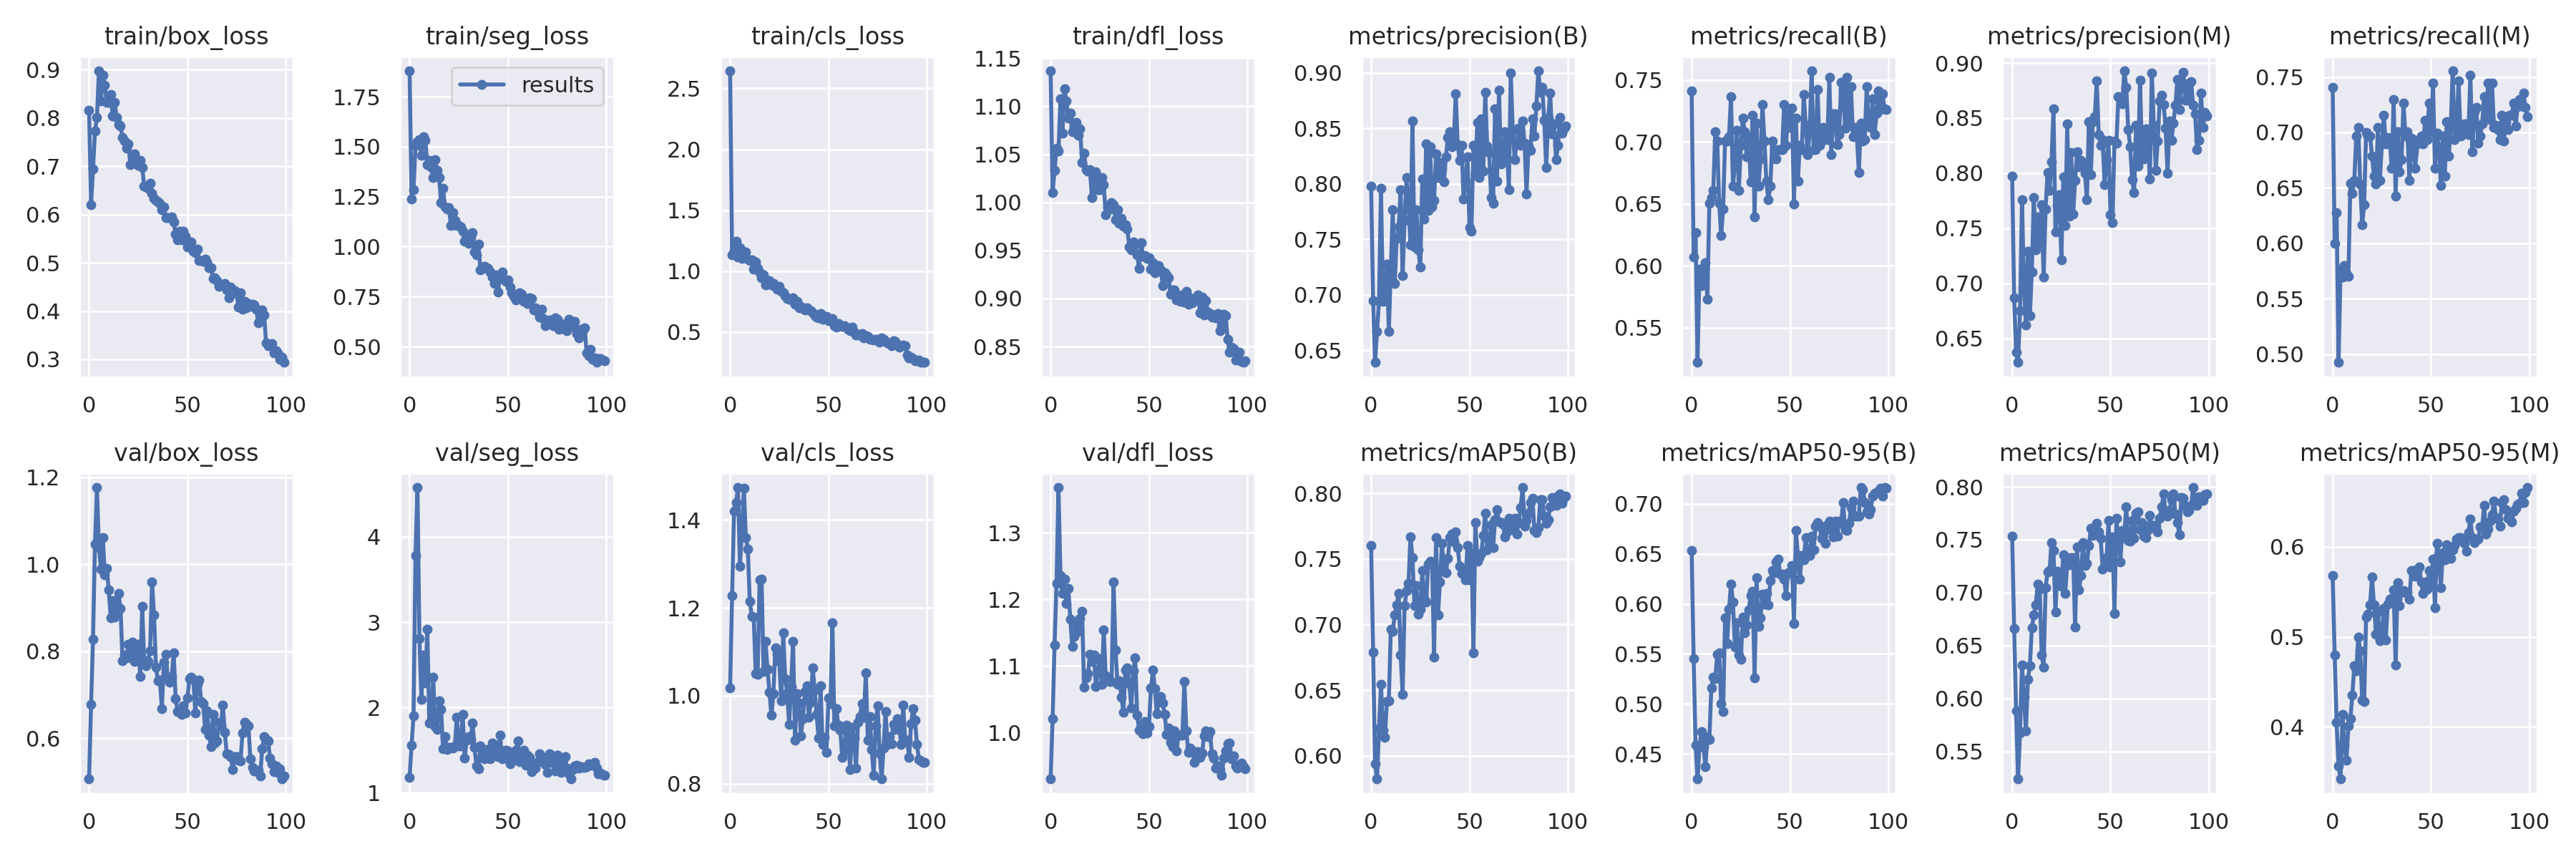

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1200, height= 600)

/content


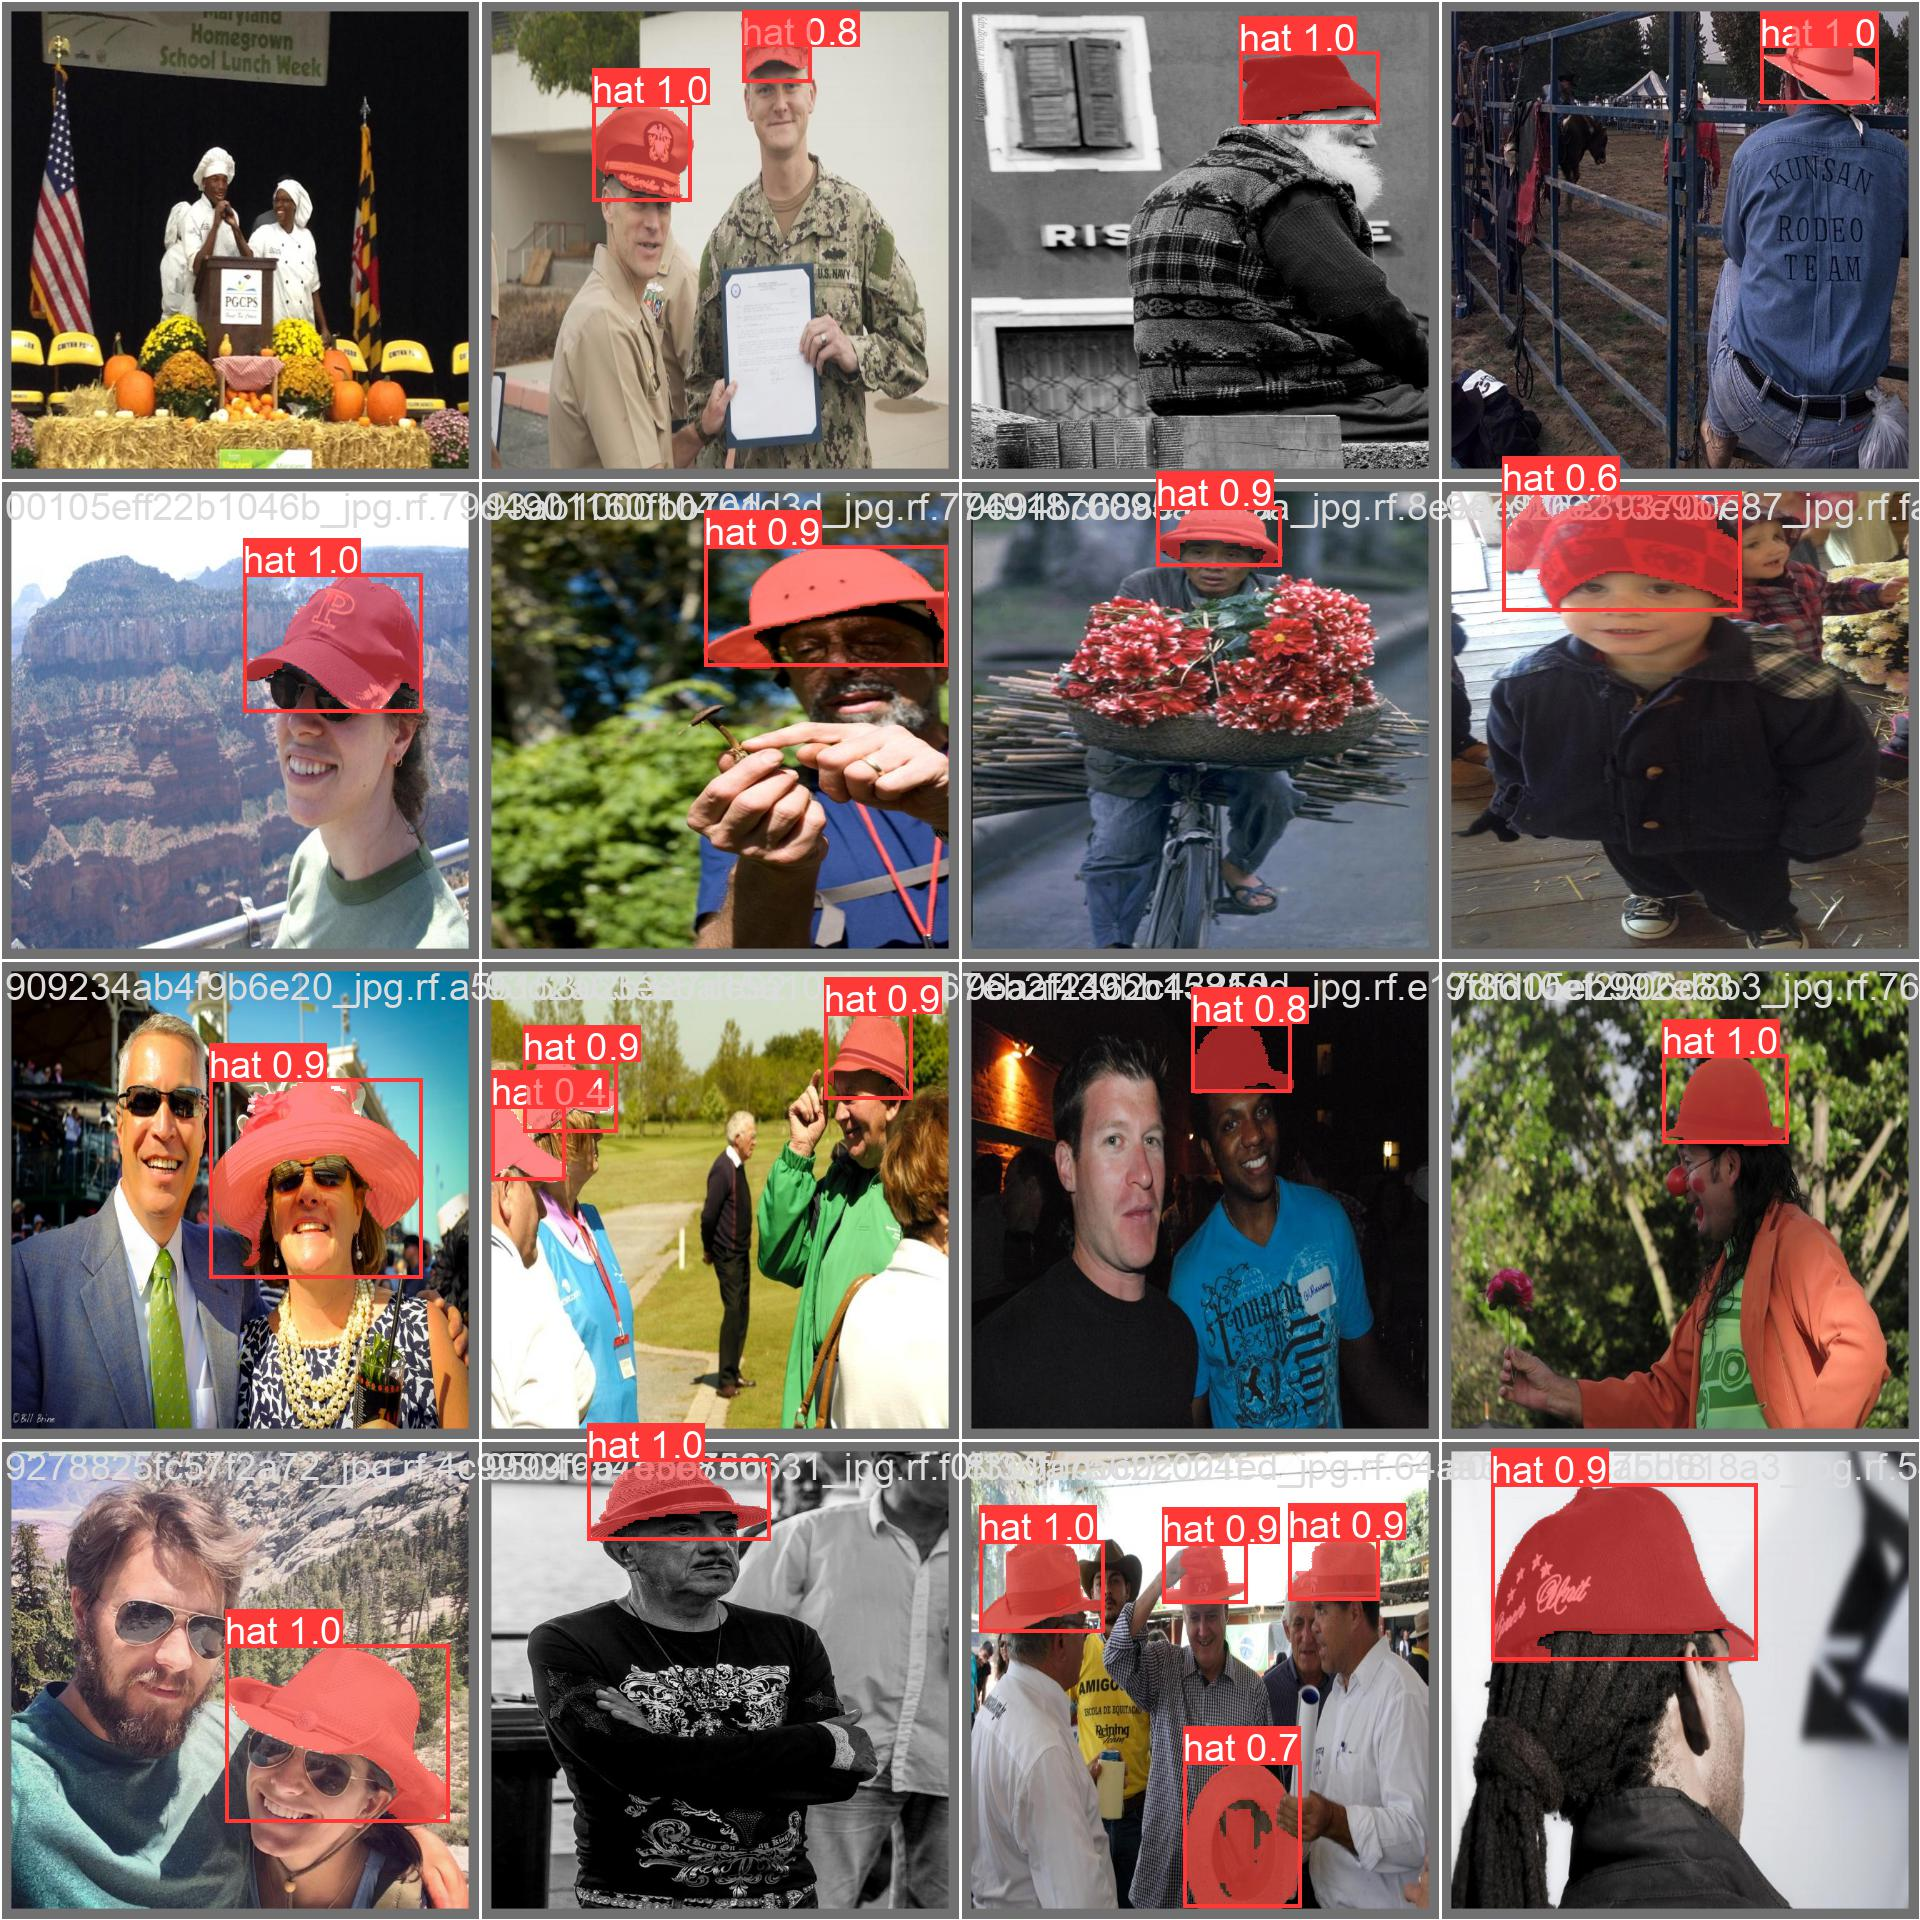

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-03 09:19:31.006810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/hat-dataset-2-2/valid/labels.cache... 194 images, 10 backgrounds, 0 corrupt: 100% 194/194 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 13/13 [00:09<00:00,  1.33it/s]
                   all        194        274      0.853      0.726      0.797      0.714      0.852      0.715      0.794      0.663
Speed: 3.0ms pre-process, 13.5ms inference, 0.0ms loss, 3.5ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-05-03 09:19:55.387284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/105 /content/datasets/hat-dataset-2-2/test/images/00010f041a2a6fa5_jpg.rf.59f596504baaebd759c0695314a9d438.jpg: 640x640 1 hat, 20.9ms
image 2/105 /content/datasets/hat-dataset-2-2/test/images/02c5d6cbc89b664b_jpg.rf.9c971f06bd3ed31db260b604fd2f2c13.jpg: 640x640 1 hat, 21.0ms
image 3/105 /content/datasets/hat-dataset-2-2/test/images/04e4bd1304862468_jpg.rf.b6effe701772e5ecbd0d0281755868cc.jpg: 640x640 1 hat, 20.9ms
image 4/105 /content/datasets/hat-dataset-2-2/test/images/067f0a2dedec8c8b_jpg.rf.d0d8bef3283193689fe303d51c93b467.jpg: 640x640 2 hats, 21.0ms
image 5/105 /content/datasets/hat-dataset-2-2/test/images/072db9e312d4318d_jpg.rf.a727d3737953bae6b1e5306fb33cf209.jpg: 640

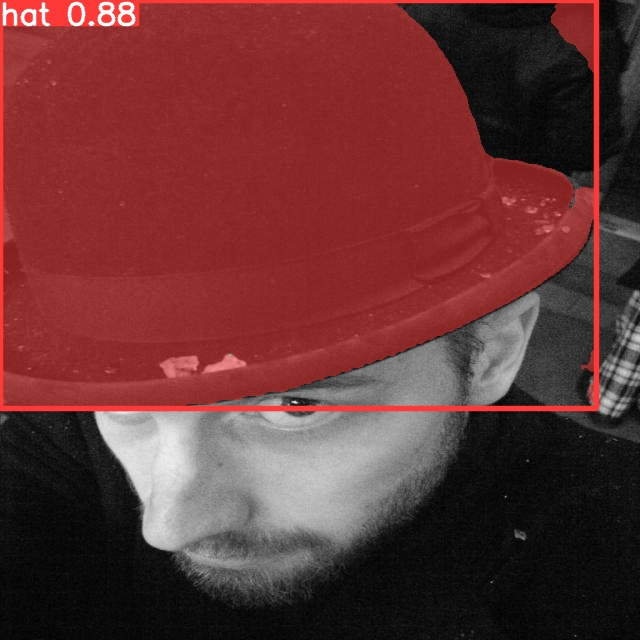

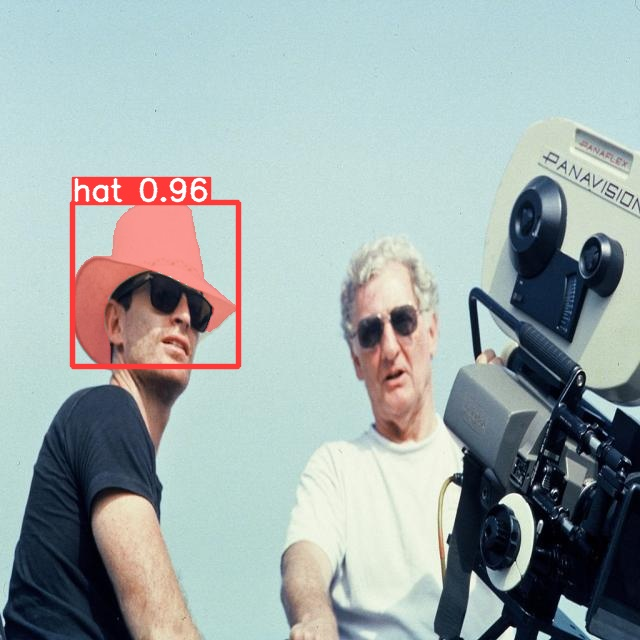

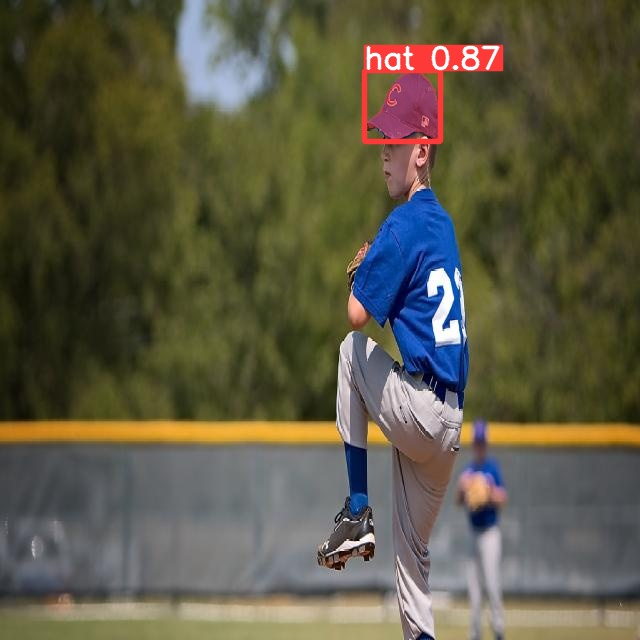

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[12:15]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Path to source folder
src_folder = "/content/runs/segment/train"

# Path to destination folder
dst_folder = "/content/drive/MyDrive/train"

# Copying the folder
shutil.copytree(src_folder, dst_folder)

'/content/drive/MyDrive/train'

In [ ]:
!yolo detect predict model={HOME}/runs/segment/train/weights/best.pt source="https://www.pexels.com/download/video/9488367/" save=True

WARNING ⚠️ 'task=detect' conflicts with segment model /content/runs/segment/train/weights/best.pt. Inheriting 'task=segment' from /content/runs/segment/train/weights/best.pt and ignoring 'task=detect'.
2023-05-03 09:45:00.545691: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

1/1: https://www.pexels.com/download/video/9488367/... Success ✅ (792 frames of shape 4096x2160 at 25.00 FPS)

0: 352x640 1952.1ms
0: 352x640 23.9ms
0: 352x640 22.3ms
0: 352x640 10.6ms
0: 352x640 1 hat, 17.5ms
0: 352x640 1 hat, 20.0ms
0: 352x640 1 hat, 28.7ms
0: 352x640 22.2ms
0: 352x640 1 hat, 10.7ms
0: 352x640 1 hat, 13.6ms
0: 352x640 13.6ms
0: 352x640 13.6ms
0: 352x640 26.9ms
0: 352x640 1 hat, 13.6ms
0: 352x640 1 hat, 26.8ms
0: 352x640 1 hat, 19.6ms
0: 352x640 1 hat, 29.0ms
0: 352x640 1 hat,

## 🏆 Congratulations


*   We have automatically segmented the data in the previous notebook, and we trained the data set we obtained in this notebook with the YoloV8 model and got the results.
*   With these SAM and DINO models, we can label faster and it will be more efficient in terms of money and time in the long run.

